In [1]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import numpy as np
from scipy import stats

from eigvec.circulant import compute_epsilon

# Convergence to Circulant Matrices

As the size of various random matrices, the $\epsilon \to 0$, suggesting increasingly circulant matrices. It's noteable that the eigenvectors do not converge to sinusoids when using SVD. This suggests the decomposition is not unique, and one solution becomes Fourier modes as $n \to \infty$.

In [2]:
# Takes a few minutes to run

# Increasing size of simulations
sizes = np.array([1e1, 1e2, 1e3, 1e4, 1e5]).astype(int)
eps = []

# Define distributiones
ds = [
    lambda i: np.random.randn(i, 1000),
    lambda i: np.random.uniform(0, 1., size=(i, 1000)),
    lambda i: np.random.exponential(1.0, size=(i, 1000)),
]

# Fourier modes (e.g. cosines)
vecs = np.fft.fft(np.eye(1000)) / np.sqrt(1000)

for d in ds:

    _eps = np.zeros((len(sizes), 20))
    
    for ii, i in tqdm(enumerate(sizes), total=len(sizes)):    

        # Run the simulations a few times to get at expectation
        for j in range(20):

            # Simulate X, sampled from one of the given distributions
            X = d(i)

            # Compute covariance
            X = np.cov(X.T)
            
            # Epsilon -> zero == circulant matrix == oscillatory eigenvectors
            _eps[ii][j] = compute_epsilon(X, vecs=vecs)
        
    eps.append(_eps)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

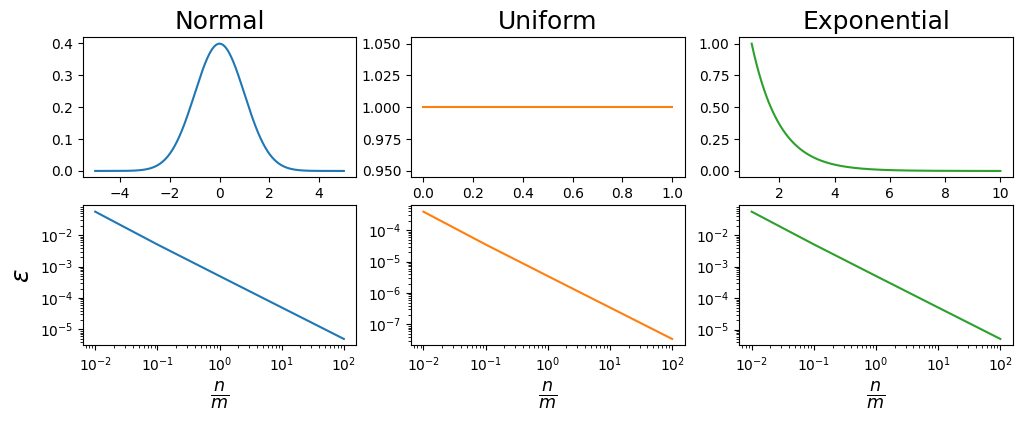

In [3]:
# Plot
fig, axes = plt.subplots(figsize=(12, 4), nrows=2, ncols=3)

axes[0][0].plot(np.linspace(-5, 5, 1000), stats.norm.pdf(np.linspace(-5, 5, 1000), 0, 1))
axes[0][1].plot(np.linspace(0, 1, 1000), stats.uniform.pdf(np.linspace(0, 1, 1000), 0, 1), color='C1')
axes[0][2].plot(np.linspace(1, 10, 1000), stats.expon.pdf(np.linspace(1, 10, 1000), 1), color='C2')

axes[0][0].set_title("Normal", size=18)
axes[0][1].set_title('Uniform', size=18)
axes[0][2].set_title("Exponential", size=18)

axes[1][0].set_ylabel(r"$\epsilon$", size=18)
axes[1][0].set_xlabel(r"$\frac{n}{m}$", size=18)
axes[1][1].set_xlabel(r"$\frac{n}{m}$", size=18)
axes[1][2].set_xlabel(r"$\frac{n}{m}$", size=18)

axes[1][0].loglog(sizes/1000, eps[0].mean(axis=1))
axes[1][1].loglog(sizes/1000, eps[1].mean(axis=1), color='C1')
axes[1][2].loglog(sizes/1000, eps[2].mean(axis=1), color='C2');